In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import missingno as msno

# Reading and previewing the dataset.

In [2]:
df = pd.read_csv('data/creditcard.csv')

In [21]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

# Check for missing values

No missing values in the dataset.


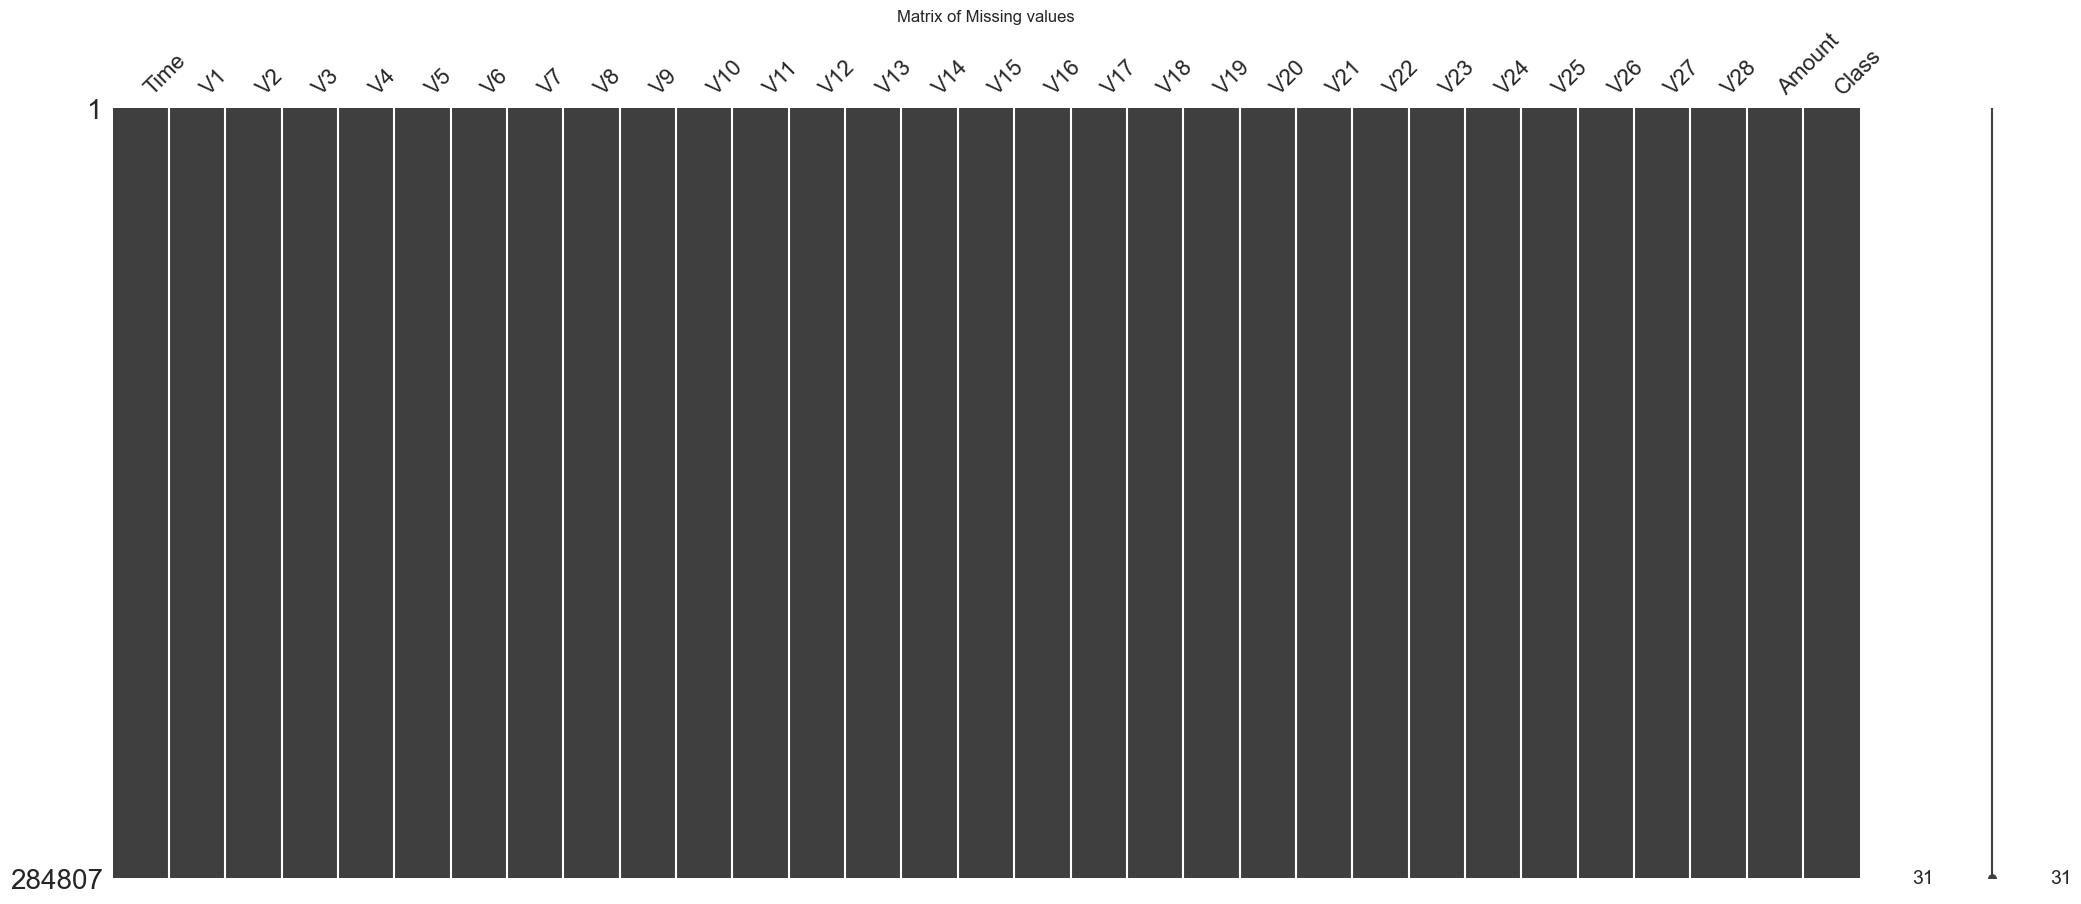

In [20]:
missing_values = df.isnull().sum()

if missing_values.sum() > 0:
    print("Dataset contains missing values.")
    print(missing_values)
else:
    print("No missing values in the dataset.")


msno.matrix(df)
plt.title('Matrix of Missing values')
plt.show()

# K-Means

In [11]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

C:\Users\nimae\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

# Result

In [14]:
# Obtain predicted labels from KMeans
predicted_labels = kmeans.labels_

# Compare predicted labels with actual Class labels
conf_matrix = confusion_matrix(df['Class'], predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(df['Class'], predicted_labels)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[152833 131482]
 [   330    162]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70    284315
           1       0.00      0.33      0.00       492

    accuracy                           0.54    284807
   macro avg       0.50      0.43      0.35    284807
weighted avg       1.00      0.54      0.70    284807



In [16]:
# Create a DataFrame combining predicted cluster labels and actual 'Class' labels
cluster_data = pd.DataFrame({'Cluster': predicted_labels, 'Class': df['Class']})

# Count the number of frauds (Class == 1) in each cluster
frauds_in_clusters = cluster_data[cluster_data['Class'] == 1].groupby('Cluster').size()
print("Number of frauds in each cluster:")
print(frauds_in_clusters)

Number of frauds in each cluster:
Cluster
0    330
1    162
dtype: int64


In [17]:
total_in_clusters = cluster_data.groupby('Cluster').size()
fraud_percentage_in_clusters = (frauds_in_clusters / total_in_clusters) * 100
print("Percentage of frauds in each cluster:")
print(fraud_percentage_in_clusters)

Percentage of frauds in each cluster:
Cluster
0    0.215457
1    0.123059
dtype: float64
